In [1]:
import os
from utils import get_runs_df
from survkit.configs import WandbConfig
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from survkit.utils import get_colors

/home/iron-man/Documents/survkit/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# change to parent directory
%cd ..

/home/iron-man/Documents/survkit


/home/iron-man/Documents/survkit/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
expert_sensitivity_dir = os.path.join('analysis', 'expert_sensitivity')
os.makedirs(expert_sensitivity_dir, exist_ok=True)

In [4]:
colors = get_colors()

# set style for plots
plt.rcParams.update({
    "font.size": 7,
    "axes.linewidth": 0.6,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
    "xtick.major.size": 2,
    "ytick.major.size": 2,
    "lines.linewidth": 0.6,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
})
# use arial font
# manually add the font to the font manager, if needed
set_font = False
if set_font:
    font_dir = os.path.join(os.environ['CONDA_PREFIX'], 'fonts')
    # if envs in path, then split on that and take the first part and join with 'fonts' to get the correct font directory
    if 'envs' in font_dir:
        font_dir = os.path.join(font_dir.split('envs')[0], 'fonts')

    for f in fm.findSystemFonts(fontpaths=[font_dir]):
        fm.fontManager.addfont(f)

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [5]:
groups = ['support2_expert_sensitivity', 'mnist_expert_sensitivity', 'sepsis_expert_sensitivity']

In [6]:
wandb_config = WandbConfig()
entity_project = f'{wandb_config.entity}/{wandb_config.project}'
dfs = {}
for group in groups:
    df = get_runs_df(entity_project, group)
    dfs[group] = df

100%|██████████| 60/60 [00:19<00:00,  3.15it/s]


In [7]:
# combine all dataframes
df = pd.concat(dfs.values(), ignore_index=True)

In [8]:
df.groupby(['dataset', 'model']).count()

name  state  id  command  _runtime  _step  \
dataset  model                                                         
MNIST    FFNetMixture        20     20  20       20        20     20   
         FFNetMixtureMTLR    20     20  20       20        20     20   
         FFNetTimeWarpMoE    20     20  20       20        20     20   
SUPPORT2 FFNetMixture        20     20  20       20        20     20   
         FFNetMixtureMTLR    20     20  20       20        20     20   
         FFNetTimeWarpMoE    20     20  20       20        20     20   
Sepsis   FFNetMixture        20     20  20       20        20     20   
         FFNetMixtureMTLR    20     20  20       20        20     20   
         FFNetTimeWarpMoE    20     20  20       20        20     20   

                           _timestamp  _wandb  grad_norm  logit_temp  ...  \
dataset  model                                                        ...   
MNIST    FFNetMixture              20      20         20          20  ...   
         FFNetMixtureMTLR          20      20         20          20  ...   
         FFNetTimeWarpMoE          20      20         20          20  ...   
SUPPORT2 FFNetMixture              20      20         20          20  ...   
         FFNetMixtureMTLR          20      20         20          20  ...   
         FFNetTimeWarpMoE          20      20         20          20  ...   
Sepsis   FFNetMixture              20      20         20          20  ...   
         FFNetMixtureMTLR          20      20         20          20  ...   
         FFNetTimeWarpMoE          20      20         20          20  ...   

                           monitored_val_metric  quantile_event_times  \
dataset  model                                                          
MNIST    FFNetMixture                        20                    20   
         FFNetMixtureMTLR                    20                    20   
         FFNetTimeWarpMoE                    20                    20   
SUPPORT2 FFNetMixture                        20                    20   
         FFNetMixtureMTLR                    20                    20   
         FFNetTimeWarpMoE                    20                    20   
Sepsis   FFNetMixture                        20                    20   
         FFNetMixtureMTLR                    20                    20   
         FFNetTimeWarpMoE                    20                    20   

                           quantize_event_times  rsf_min_samples_split  \
dataset  model                                                           
MNIST    FFNetMixture                        20                     20   
         FFNetMixtureMTLR                    20                     20   
         FFNetTimeWarpMoE                    20                     20   
SUPPORT2 FFNetMixture                        20                     20   
         FFNetMixtureMTLR                    20                     20   
         FFNetTimeWarpMoE                    20                     20   
Sepsis   FFNetMixture                        20                     20   
         FFNetMixtureMTLR                    20                     20   
         FFNetTimeWarpMoE                    20                     20   

                           early_stopping_patience  administrative_censoring  \
dataset  model                                                                 
MNIST    FFNetMixture                           20                        20   
         FFNetMixtureMTLR                       20                        20   
         FFNetTimeWarpMoE                       20                        20   
SUPPORT2 FFNetMixture                           20                        20   
         FFNetMixtureMTLR                       20                        20   
         FFNetTimeWarpMoE                       20                        20   
Sepsis   FFNetMixture                           20                        20   
         FFNetMixtureMTLR                      

In [9]:
def dataset_configuration(row):
    if row['dataset'] != 'MNIST':
        return row['dataset']
    if row['mnist_means'] == [1, 5, 9, 13, 17, 21, 25, 29, 33, 37] and row['mnist_stds'] == [1, 2, 3, 1, 2, 3, 1, 1, 1, 1]:
        return 'Survival MNIST'

In [10]:
df['dataset'] = df.apply(dataset_configuration, axis=1)

In [11]:
# rename model column
df.rename(columns={'model': 'Model', 'dataset': 'Dataset', 'mixture_components': 'Experts'}, inplace=True)
# rename models
model_map = {'FFNet': 'MTLR', 'FFNetMixture': 'Fixed MoE', 'FFNetTimeWarpMoE': 'Adjustable MoE', 'FFNetMixtureMTLR': 'Personalized MoE', 'SKSurvCox': 'CoxPH', 'SKSurvRF': 'RSF'}
df['Model'] = df['Model'].replace(model_map)

In [12]:
# group by model and get mean and std of various metrics
metrics_df = df.groupby(['Model', 'Dataset', 'Experts'], as_index=False).agg(**{
                                                      'Loss': ('test_loss', 'mean'),
                                                      'Loss Std': ('test_loss', 'std'),
                                                      })

Plotting loss for dataset: SUPPORT2


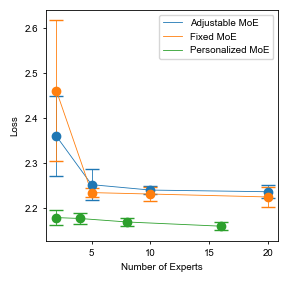

Plotting loss for dataset: Sepsis


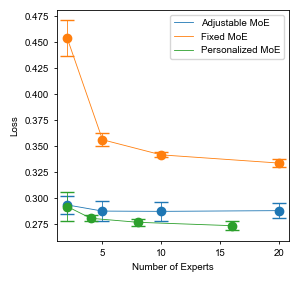

Plotting loss for dataset: Survival MNIST


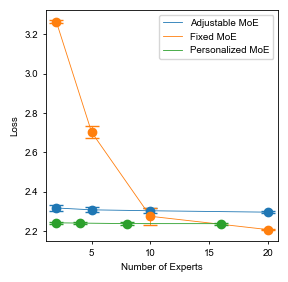

In [14]:
# for each model, within the each dataset, plot the loss as a function of the number of experts in the mixture model
for dataset in metrics_df['Dataset'].unique():
    print(f'Plotting loss for dataset: {dataset}')
    fig, ax = plt.subplots(figsize=(3, 3))
    dataset_df = metrics_df[metrics_df['Dataset'] == dataset]
    dark_colors = [k for k, v in colors.items() if 'dark' in k]
    for idx, model in enumerate(dataset_df['Model'].unique()):
        model_df = dataset_df[dataset_df['Model'] == model]
        ax.plot(model_df['Experts'], model_df['Loss'], label=model, color=colors[dark_colors[idx]])
        # error bars for loss std
        ax.errorbar(model_df['Experts'], model_df['Loss'], yerr=model_df['Loss Std'], fmt='o', color=colors[dark_colors[idx]], capsize=5)

    ax.set_xlabel('Number of Experts')
    ax.set_ylabel('Loss')
    ax.legend(loc='upper right', fontsize=7)
    plt.show()
    fig.savefig(os.path.join(expert_sensitivity_dir, f'expert_sensitivity_{dataset}_loss.pdf'), bbox_inches='tight')